<a href="https://colab.research.google.com/github/eshnil2000/google-colab/blob/master/linear_regression_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install and import all required modules
%%capture
import warnings
warnings.simplefilter('ignore')
#Install required modules
!pip install tensorflow numpy matplotlib pandas sklearn
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import csv
import matplotlib.pyplot as plt

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


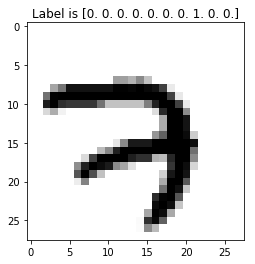

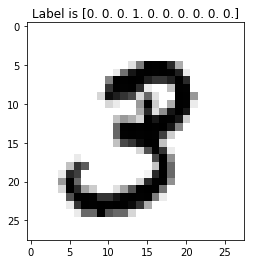

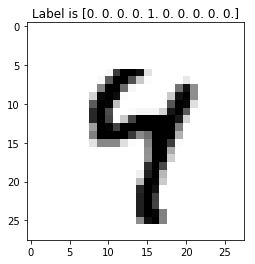

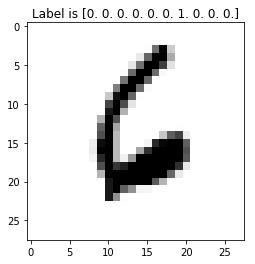

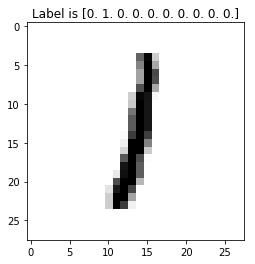

In [29]:
#Plot a few sample images, check Labels of image
DATA_DIR = '/tmp/data'

data = input_data.read_data_sets(DATA_DIR, one_hot=True)

max_images=5
start_image=0

for image in range(max_images):
  pixels= data.train.images[start_image + image]
  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))
  label= data.train.labels[start_image + image]
  # Plot
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels,cmap='gray_r')
  plt.show()


In [30]:
#Train the model
NUM_STEPS = 1000
MINIBATCH_SIZE = 100


data = input_data.read_data_sets(DATA_DIR, one_hot=True)

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]),name="weights")

y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x, W)
y_final = tf.nn.softmax(tf.matmul(x,W))

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=y_pred, labels=y_true))

gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))
classification=[]
with tf.Session() as sess:

    # Train
    sess.run(tf.global_variables_initializer())
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})
        
    # Test
    ans = sess.run(accuracy, feed_dict={x: data.test.images, y_true: data.test.labels})
    classification= sess.run(y_final, feed_dict={x: data.test.images})
    
    #print(tf.trainable_variables())
    var = [v for v in tf.trainable_variables() ]
    
print("Accuracy: {:.4}%".format(ans*100))
#print(len(classification))


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Accuracy: 91.74%


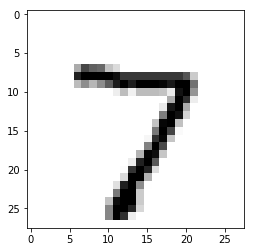

Predicted value is: 7


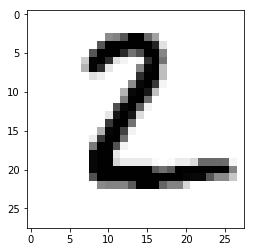

Predicted value is: 2


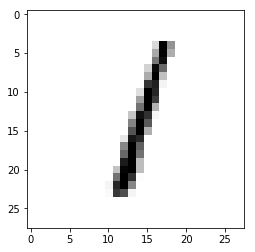

Predicted value is: 1


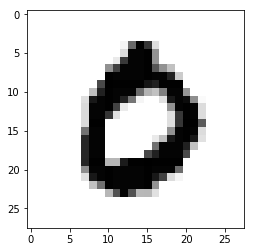

Predicted value is: 0


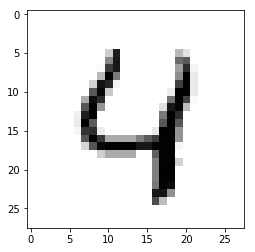

Predicted value is: 4


In [31]:
#Test the predictions
for i in range(5):
  plt.imshow(data.test.images[i].reshape(28,28),cmap='gray_r')
  plt.show()
  print("Predicted value is:", np.argmax(classification[i]))